# Re-execution rate per publication year

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

sns.set_context("paper", font_scale=1)

In [85]:
total = pd.read_csv("total.csv", index_col=0)

In [86]:
total = total[total['publicationDate'] > 2014]

In [87]:
def success(el):
    if pd.isna(el):
        return el
    if el == 'success':
        return 1
    if len(str(el))>1:
        return 0
    else:
        el

total['r32_success']=total["r32"].apply(success)
total['r36_success']=total["r36"].apply(success)
total['r40_success']=total["r40"].apply(success)

In [88]:
from helpers import autolabel, autolabel_count

In [89]:
barWidth = 0.8

In [90]:
def plot_func(temp, ptitle, plt):
    names = list(temp.index)
    temp.fillna(0.0, inplace=True)
    temp['total'] = [i+j for i,j in zip(temp[1],temp[0])]

    temp['s'] = [i* 100./ j  for i,j in zip(temp[1], temp['total'])]
    temp['f'] = [i* 100./ j  for i,j in zip(temp[0], temp['total'])]

    r= range(0,len(temp['s']))

    lrects = sns.barplot(
        x=r, y="s", 
        data=temp,  
        color=sns.color_palette("Set2")[0], 
        label="Success", 
        ax=plt)
    hrects = sns.barplot(
        x=r, y="f", 
        data=temp, 
        bottom=temp['s'], 
        color=sns.color_palette("Set2")[1], 
        label="Error", ax=plt)
    
    plt.set_xticks(r)
    plt.set_xticklabels(names)
    #plt.set_xtickslabels(names) #, rotation=90, fontsize=15)
    plt.legend(loc='best', ncol=1) #,prop={'size': 12})

    autolabel(plt.patches[:6], plt)
    autolabel_count(plt.patches[6:], plt, temp)

    plt.set_title(ptitle)

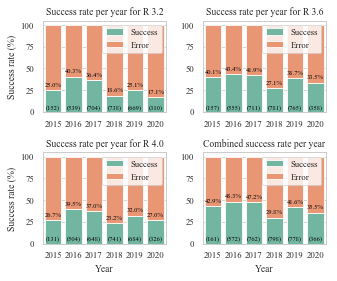

In [91]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(4.78,4))
sns.set_context("paper", font_scale=1)

temp1 = total.groupby(
    ['r32_success', 'publicationDate']).size().reset_index().pivot(
    columns='r32_success', index='publicationDate', values=0)
plot_func(temp1, ptitle="Success rate per year for R 3.2", plt = ax1)

temp2 = total.groupby(
    ['r36_success', 'publicationDate']).size().reset_index().pivot(
    columns='r36_success', index='publicationDate', values=0)
plot_func(temp2, ptitle="Success rate per year for R 3.6", plt=ax2)

temp3 = total.groupby(
    ['r40_success', 'publicationDate']).size().reset_index().pivot(
    columns='r40_success', index='publicationDate', values=0)
plot_func(temp3, ptitle="Success rate per year for R 4.0", plt = ax3)

temp4 = total.groupby(
    ['success', 'publicationDate']).size().reset_index().pivot(
    columns='success', index='publicationDate', values=0)
plot_func(temp4, ptitle="Combined success rate per year", plt = ax4)

ax1.set(xlabel='', ylabel='Success rate (%)')
ax2.set(xlabel='', ylabel='')
ax3.set(xlabel='Year', ylabel='Success rate (%)')
ax4.set(xlabel='Year', ylabel='')

plt.tight_layout()
plt.savefig("year-version.pdf", bbox_inches = "tight", dpi=100)